# Tutorial #4: 

First, click on the filename at the top left of the page (to the right of the Jupyter logo) and change the name to be in the following format:

LASTNAME_FIRSTNAME_tXX

where XX is the number for the tutorial (e.g., 05 for tutorial 5, or 11 for tutorial 11). 

Tutorials consist of instructional text followed by cells that you will run to complete the assignment. These are timed assignments (due at the end of class), so if you are not finished by the end of the time limit, you will just submit whatever you were able to complete.

Make sure you always print out what the tutorial asks you to print out! 

The next cell contains an example of an instruction you might see in an assignment about print statements:

Print your full name.

In [1]:
print("Insan Adhikari")

Insan Adhikari


**Imports**

We will need the numpy, scipy.constants, and matplotlib.pyplot modules for this tutorial. Import them here; note that we used **as** to shorten the module name.

In [1]:
import numpy as np
import scipy.constants as constants
import matplotlib.pyplot as plt

**Planck's Law of Blackbody Radiation**

All objects radiate. In fact, opaque objects produce a continuous spectrum of radiation and such objects are known as "blackbodies". A blackbody perfectly absorbs all radiation it receives and then radiates an energy density $B$ according to Planck's law:

$B(\lambda, T) = \frac{ 2 h c^2}{ \lambda^5 \big(\exp{ \frac{hc}{\lambda k T}} -1 \big)}$

where $h$ is Planck's constant, $c$ is the speed of light, $k$ is the Boltzmann constant, $\lambda$ is the emission wavelength, and $T$ is the temperature of the blackbody. Note that the '$\exp{}$' is the Euler's number $e=2.7182$, which is available as a function in numpy.

Our goal in this tutorial is to make a plot of Planck's Law

#### <span style="color:blue"> Exercise 4.1: Units</span>

The units of the Planck function in CGS units are [ergs/s/cm^2/Angstrom/steradian]. That is, it is the amount of energy ($ergs$) put out each second ($s$) in a wavelength range ($Angstroms$) which is radiated by a surface area ($cm^2$) into a solid angle of space (steradian or $sr$)

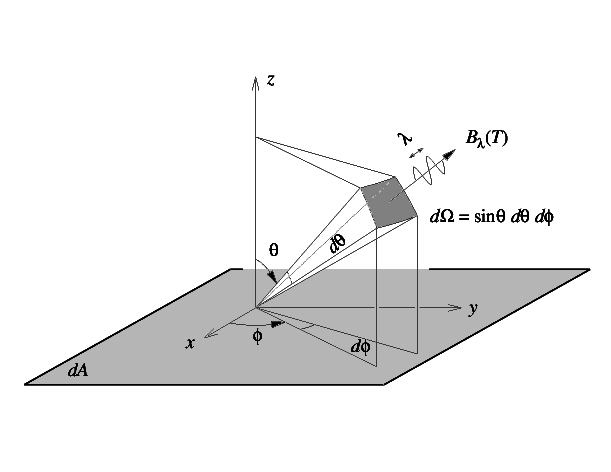

This means you will need to use the right constants to get your units right. 

Let's start with the argument for the exponential function. $\exp(...)$ is a function that takes a unitless argument (like sine or cosine or raising a number to a power). For instance, you should be taking the exponent of $\exp(-2)$ rather than $\exp(-2 \mathrm{ m})$.  

Assume that your temperatures are given in degrees K, wavelengths in cm, and c in cm/s. What units would you want to have on your Planck's constant $h$ and Boltzmann constant $k$ so that the argument of your exponential is unitless?  Note that $h$ is typically given in units of $[energy]\times[time]$ and $k$ is in units of $[energy]/[temperature]$.

    Give units for h and k here

<font color='cyan' face="Fira Code" size="+1">

h = [energy] * [time]
energy_cgs is in ergs
time_cgs is in seconds

units_h = ergs * seconds

k = [energy] / [temperature]
energy_cgs is in ergs
temperature_cgs is in kelvin

units_k = ergs / kelvin
<font>

You can assume that a sr is a unitless quantity (and so you just need to reduce down to $erg/s/cm^2/Angstrom$. Also assume that 1 cm = 10^8 Angstroms, so you will likely need to divide your final answer by 10^8 Angstroms to get the correct units in the end.

Now the values for $h$, $c$, $k$ in the [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html) module. 

In [6]:
#Example: Here's the speed of light: c
print(constants.c)
# seems to have units of m/s

# We can get a little deeper using the dictionary
print(constants.find('light'))
# that tells us the name of the constant in our dictionary
print(constants.physical_constants['speed of light in vacuum'])
# the dictionary entry tells us the units are in m s^-1 with 0.0 uncertainty

# Let's set them to our own variables  in cgs units as follows:
c=constants.c*100. # in cm/s
print(c)

299792458.0
['speed of light in vacuum']
(299792458.0, 'm s^-1', 0.0)
29979245800.0


    find h and k and set up your own variables. You will likely need to use the conversion from Joules to ergs: 1 Joule = 1e7 ergs.

In [24]:
print(constants.find('Planck'))
print(constants.physical_constants['Planck constant']) # in J s
# erg = j * 10^-7 so,
h_cgs = constants.h*1e7 # in erg s

print(h_cgs)

['Planck constant', 'Planck constant in eV/Hz', 'Planck length', 'Planck mass', 'Planck mass energy equivalent in GeV', 'Planck temperature', 'Planck time', 'molar Planck constant', 'reduced Planck constant', 'reduced Planck constant in eV s', 'reduced Planck constant times c in MeV fm']
(6.62607015e-34, 'J Hz^-1', 0.0)
6.62607015e-27


In [23]:
print(constants.find('Boltzman'))
print(constants.physical_constants['Boltzmann constant']) # in J K^-1
# same conversion from J -> erg (*10^-7)
k_cgs = constants.k*1e7 # in erg K^-1

print(k_cgs)

['Boltzmann constant', 'Boltzmann constant in Hz/K', 'Boltzmann constant in eV/K', 'Boltzmann constant in inverse meter per kelvin', 'Stefan-Boltzmann constant']
(1.380649e-23, 'J K^-1', 0.0)
1.380649e-16


Check using Google that these constants have the right units. Do they? What are the default units in scipy.const of $h, k$?

<font color='cyan' face="Fira Code" size="+1">
Yes these values and units are correct but they are in SI units so:

h was in J s or J hz^-1
k was in J/K or J K^-1
<font>


#### <span style="color:blue"> Exercise 4.2: Make a plot</span>

Now that we have our constants set up all we need to do is evaluate Planck's Law to make a plot.

Recall:

$B(\lambda, T) = \frac{ 2 h c^2}{ \lambda^5 \big(\exp{ \frac{hc}{\lambda k T}} -1 \big)}$

which means that $B$ is a function of both $\lambda$ and $T$. We want to look at the spectrum, which typically means "function of wavelength" (or "of frequency" or "of energy"). And we can plot the spectrum for a given Blackbody temperature. 

So assume some temperature. Say $T=300$ K.

In [25]:
temp = 300

Now make a list with 100 entries, varying the wavelength from UV wavelengths (100 nm) up to infrared (100 $\mu \text{m}$ wavelengths).

In [46]:
# 100 nm = 100*10^-7 cm = 10^-5 cm
# 100 um = 100*10^-4 cm = 10^-2 cm
lamdaArray = np.linspace(10**-5, 10**-2, 100)

Now evaluate $B$ for your chosen $T$ for every wavelength in your list.

In [47]:
h_cgs = constants.h * 1e7
k_cgs = constants.k * 1e7
c_cgs = constants.c * 100

blackBodyRad = (2 * h_cgs * c_cgs**2)/(lamdaArray**5 * (np.exp((h_cgs * c_cgs) / (lamdaArray * k_cgs * temp) ) - 1))
print(blackBodyRad)


[6.18929573e-189 1.17858519e-004 4.10154542e+003 8.70653602e+005
 9.06553824e+006 2.95746607e+007 5.57046897e+007 7.82124152e+007
 9.26389813e+007 9.88981744e+007 9.88512894e+007 9.46667243e+007
 8.81385416e+007 8.05414915e+007 7.26982149e+007 6.50977380e+007
 5.80036739e+007 5.15361241e+007 4.57283488e+007 4.05639381e+007
 3.60002810e+007 3.19829023e+007 2.84539131e+007 2.53567613e+007
 2.26387087e+007 2.02519409e+007 1.81538835e+007 1.63070738e+007
 1.46788043e+007 1.32406646e+007 1.19680561e+007 1.08397196e+007
 9.83729758e+006 8.94494058e+006 8.14895840e+006 7.43751629e+006
 6.80037191e+006 6.22864898e+006 5.71464336e+006 5.25165721e+006
 4.83385743e+006 4.45615489e+006 4.11410135e+006 3.80380155e+006
 3.52183806e+006 3.26520709e+006 3.03126351e+006 2.81767373e+006
 2.62237527e+006 2.44354198e+006 2.27955410e+006 2.12897245e+006
 1.99051611e+006 1.86304310e+006 1.74553366e+006 1.63707568e+006
 1.53685208e+006 1.44412977e+006 1.35825002e+006 1.27862006e+006
 1.20470570e+006 1.136024

 Now plot B vs wavelength with the appropriate units. Make sure to label the temperature that you used for your blackbody.

Text(0.5, 1.0, 'Black Body Radiance vs Wavelength')

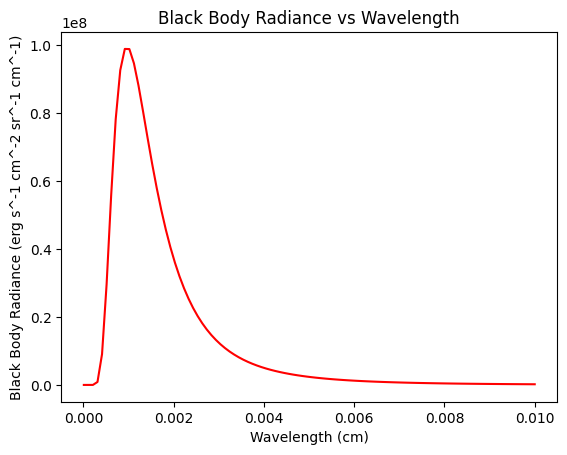

In [48]:
plt.plot(lamdaArray, blackBodyRad, 'r')
plt.xlabel('Wavelength (cm)')
plt.ylabel('Black Body Radiance (erg s^-1 cm^-2 sr^-1 cm^-1)')
plt.title('Black Body Radiance vs Wavelength')

Now plot 3 different blackbody curves, using a list of 5 different blackbody temperatures ranging from 200 K to 500 K. Make sure to label both your axes and the different lines with their temperatures.

C:\Users\Insan\AppData\Local\Temp\ipykernel_13028\1555695839.py:3: RuntimeWarning: overflow encountered in exp
  return (2 * h_cgs * c_cgs**2)/(lamda**5 * (np.exp((h_cgs * c_cgs) / (lamda * k_cgs * temp) ) - 1))


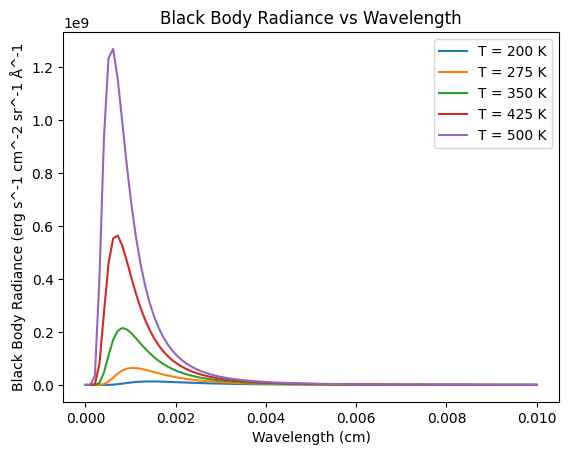

In [76]:
def blackBodyRad(lamda, temp):
    # function to calculate black body radiance for an object given wavelength and temperature
    return (2 * h_cgs * c_cgs**2)/(lamda**5 * (np.exp((h_cgs * c_cgs) / (lamda * k_cgs * temp) ) - 1))

temps = np.linspace(200,500,5) # 5 blackbodies equally spaced between 200 and 500 K
#print(temps)

# create 5 arrays of black body radiance at each temperature
blackBodyRad1 = blackBodyRad(lamdaArray, temps[0])
blackBodyRad2 = blackBodyRad(lamdaArray, temps[1])
blackBodyRad3 = blackBodyRad(lamdaArray, temps[2])
blackBodyRad4 = blackBodyRad(lamdaArray, temps[3])
blackBodyRad5 = blackBodyRad(lamdaArray, temps[4])

# plot all 5 black bodies on the same plot
plt.plot(lamdaArray, blackBodyRad1, label='T = 200 K')
plt.plot(lamdaArray, blackBodyRad2, label='T = 275 K')
plt.plot(lamdaArray, blackBodyRad3, label='T = 350 K')
plt.plot(lamdaArray, blackBodyRad4, label='T = 425 K')
plt.plot(lamdaArray, blackBodyRad5, label='T = 500 K')

# label the plot correcty
plt.xlabel('Wavelength (cm)')
plt.ylabel('Black Body Radiance (erg s^-1 cm^-2 sr^-1 Å^-1')
plt.title('Black Body Radiance vs Wavelength')

plt.legend()



#### <span style="color:blue"> Optional Exercise 4.3: Make a log-scale plot.</span>

You may have noticed that some of your curves are hard to read. You can zoom into the smaller numbers more easily with a semilog (semilogx or semilogy) plot or even a log-log plot. Chose one and make remake the plot above. You can even expand the range of the temperatures and/or wavelengths that you're looking at if you like.

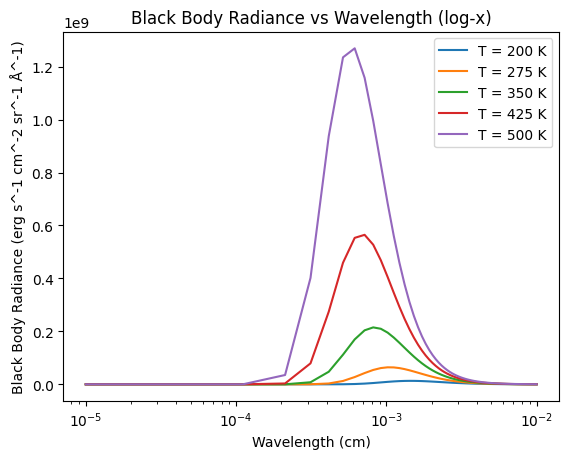

In [82]:
plt.plot(lamdaArray, blackBodyRad1, label='T = 200 K')
plt.plot(lamdaArray, blackBodyRad2, label='T = 275 K')
plt.plot(lamdaArray, blackBodyRad3, label='T = 350 K')
plt.plot(lamdaArray, blackBodyRad4, label='T = 425 K')
plt.plot(lamdaArray, blackBodyRad5, label='T = 500 K')

plt.xscale('log')

plt.xlabel('Wavelength (cm)')
plt.ylabel('Black Body Radiance (erg s^-1 cm^-2 sr^-1 Å^-1)')
plt.title('Black Body Radiance vs Wavelength (log-x)')

plt.legend()
plt.show()

After you have completed this tutorial, click the filename at the top left of the page (to the right of the Jupyter logo) and change the name to be in the following format:

Lastname_Firstname_tXX

where XX is the number for the tutorial (e.g., 05 for tutorial 5, or 11 for tutorial 11). After changing the name, download the notebook file:

File > Download as > Notebook (.ipynb)

and then upload it to the appropriate Dropbox on the Canvas website (you will find the file you want to upload in your Downloads folder when using the Canvas Dropbox page).